# AI 221 Machine Exercise 2
## Name | SN
## Miguel Luis Martinez | 201907128
## Name | SN
#
To replicate the results of the notebook, run all cells in sequence.

In [13]:
#Import libraries
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, root_mean_squared_error, mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.impute import KNNImputer
from IPython.display import display, HTML

In [14]:
height = "6000px"

display(HTML(f"""
<style>
.output {{
    max-height: {height} !important;  /* Adjust the value as needed */
}}
</style>
"""))

In [15]:
seed = 413094539 #seed used for the report
#uncomment to generate a new seed
#seed = np.random.randint((2**31)-1)
rng = np.random.default_rng(seed)
penguin_split_seed = rng.integers((2**31)-1)
bike_split_seed = rng.integers((2**31)-1)


print(f"Seed used for randomizer: {seed}")
print(f"Palmer Penguin Train-test Splitter Seed: {penguin_split_seed}")
print(f"Bike Sharing Train-test Splitter Seed: {bike_split_seed}")

Seed used for randomizer: 413094539
Palmer Penguin Train-test Splitter Seed: 383458658
Palmer Penguin SVM Classifier Seed: 52056122
Bike Sharing Train-test Splitter Seed: 470541649
Bike Sharing SVM Classifier Seed: 948028578


## Problem 1: Palmer Penguin Species Data Set

In [16]:
#Load the palmer penguins dataset
df_p_raw = pd.read_csv("./datasets/penguins_size.csv")
display(df_p_raw.head())
df_p = df_p_raw[['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
display(df_p)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


### 1.a.
* Visualize the 4 numerical features with Seaborn pair plot
* Set hue to penguin species

Histogram pairwise plot:
Kernel Density Estimator plot:


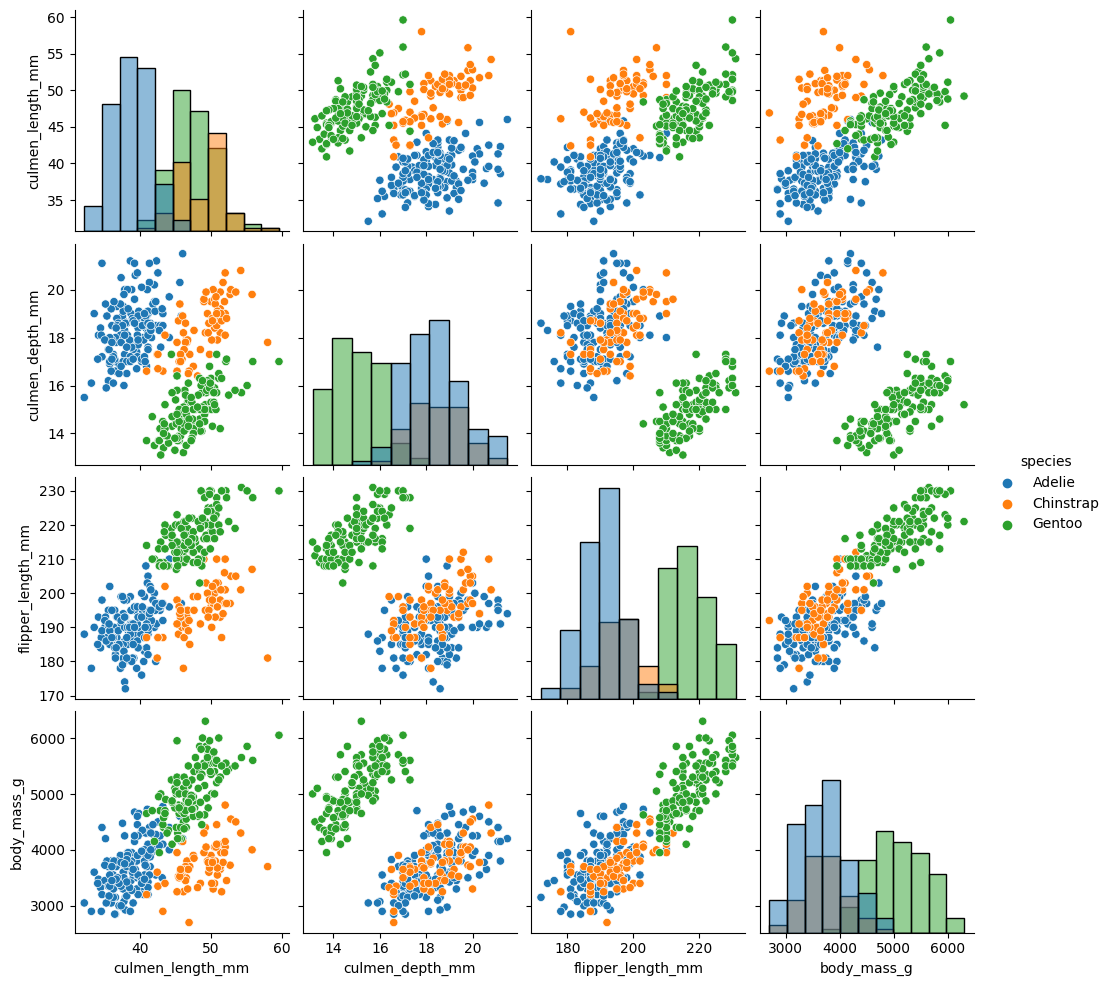

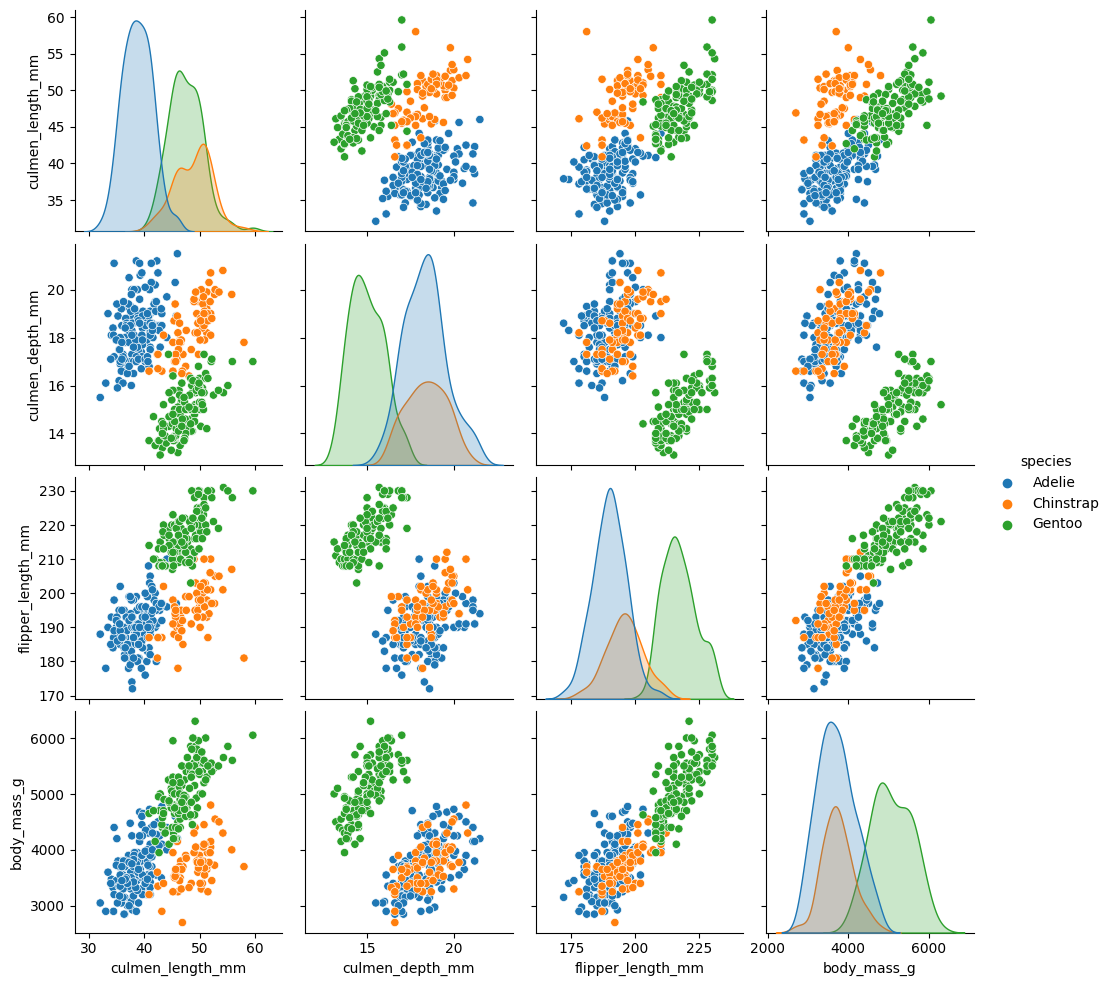

In [19]:
print("Histogram pairwise plot:")
sns.pairplot(df_p, hue='species', diag_kind='hist')
print("Kernel Density Estimator plot:")
sns.pairplot(df_p, hue='species', diag_kind="kde")


### 1.b.
* Randomly split samples into 75% training, 25% testing, stratify = y

* Build pipeline with standard scaler and SVC
* Train with default settings on SVC


* Report accuracy, macro-averaged F1 score, confusion matrix for training and testing data

### 1.c.
* Visualize decision boundary for culmen length vs. flipper length


* Show scatter plots for training and testing data sets

* Evaluate 5 better SVC models with different box constraint, kernel function, kernel parameter, multi-class strategy
* Report accuracy, macro-averaged F1 score, confusion matrix for training and testing data

In [10]:
# We encode the labels first
label_encoder = LabelEncoder()
df_p.loc[:,'species'] = label_encoder.fit_transform(df_p['species'])

display(df_p.dtypes)

species                int64
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object

In [11]:
# Convert to numpy matrix and remove rows with NaN values
np_mtrx = df_p.values

nan_rows = np.isnan(np_mtrx).any(axis=1)
np_mtrx = np_mtrx[~nan_rows]
print(np_mtrx)

[[0.00e+00 3.91e+01 1.87e+01 1.81e+02 3.75e+03]
 [0.00e+00 3.95e+01 1.74e+01 1.86e+02 3.80e+03]
 [0.00e+00 4.03e+01 1.80e+01 1.95e+02 3.25e+03]
 ...
 [2.00e+00 5.04e+01 1.57e+01 2.22e+02 5.75e+03]
 [2.00e+00 4.52e+01 1.48e+01 2.12e+02 5.20e+03]
 [2.00e+00 4.99e+01 1.61e+01 2.13e+02 5.40e+03]]


[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2

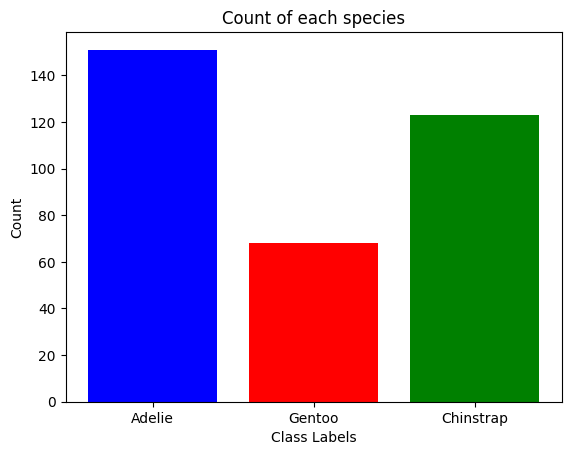

In [12]:
X = np_mtrx[:,1:]
y = np_mtrx[:,0]
print(X)
print(y)

class_labels = ['Adelie', 'Gentoo', 'Chinstrap'] 
class_counts = [np.sum(y == i) for i in range(len(class_labels))]
print(class_counts)
plt.bar(class_labels, class_counts, color=['blue', 'red', 'green'])
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Count of each species')
plt.show()


In [ ]:
# Defining class labels and colors
colors = ['blue', 'red', 'green'] 

# Creating a dictionary mapping 
label_map = {0: 'Adelie', 1: 'Gentoo', 2: 'Chinstrap'}

# Visualizing 2D data with the labels and colors
for i, class_label in enumerate(class_labels):
    class_indices = np.where(y == i)[0]  
    plt.scatter(X[class_indices, 0], X[class_indices, 2], color=colors[i], edgecolor="k", label=class_label)

plt.xlabel('culmen_length_mm')
plt.ylabel('flipper_length_mm')
plt.legend()
plt.show()

In [ ]:
# Creating a sns pairplot
g = sns.pairplot(df, hue='species', palette=colors, height=4, diag_kind="kde")
legend_labels = ['Adelie', 'Gentoo', 'Chinstrap']
for t, l in zip(g._legend.texts, legend_labels):
    t.set_text(l)

plt.show()

In [ ]:
# Split dataset into 75% training and 25% testing
np.random.shuffle(np_mtrx)
split_index = int(0.75 * np_mtrx.shape[0])  
train_set = np_mtrx[:split_index]
test_set = np_mtrx[split_index:]
X_train = train_set[:, [1, 2]]
X_test = test_set[:, [1, 2]]
y_train = train_set[:, 0]
y_test = test_set[:, 0]

print("Number of items in X train:", X_train.shape[0])
print("Number of items in X test:", X_test.shape[0])
print("Number of items in y train:", y_train.shape[0])
print("Number of items in y test:", y_test.shape[0])

In [ ]:
# Define the three classifiers
svm_ovo = OneVsOneClassifier(make_pipeline(StandardScaler(), SVC())).fit(X,y)
svm_ovr = OneVsRestClassifier(make_pipeline(StandardScaler(), SVC())).fit(X,y)
svm_ecoc = OutputCodeClassifier(make_pipeline(StandardScaler(), SVC()),
                                code_size=3).fit(X,y)


# Evaluation metrics and decision boundary function
def classifier_evaluation_metrics(classifiers, X_train, X_test, y_train, y_test):
    title = "\033[1mPerformance Metrics per classifier\033[0m"
    width = 60
    print("_" * 55)
    print(title.center(width))
    print("_" * 55)
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    
    y_train_preds = []
    y_test_preds = []
    metric_scores = {}  # Dictionary to store metric scores
    
    # Printing evaluation metrics for each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_train_preds.append(y_train_pred)
        y_test_pred = clf.predict(X_test)
        y_test_preds.append(y_test_pred)
        
        # Metrics for training set
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, average='macro')
        train_recall = recall_score(y_train, y_train_pred, average='macro')
        train_f1 = f1_score(y_train, y_train_pred, average='macro')
        
        # Metrics for test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro')
        test_recall = recall_score(y_test, y_test_pred, average='macro')
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        
        train_scores = [train_accuracy, train_precision, train_recall, train_f1]
        test_scores = [test_accuracy, test_precision, test_recall, test_f1]
        
        metric_scores[name + ' (Train)'] = dict(zip(metrics, train_scores))
        metric_scores[name + ' (Test)'] = dict(zip(metrics, test_scores))
        

    # Print training scores
    print("\n\n\033[1mTraining Scores\033[0m")
    print("_" * 55)
    print("\n\n{:<14}    {:<10} {:<10} {:<10} {:<10}".format("Classifier", *metrics))
    print("-" * 55)
    i =  0
    for classifier_name, scores in metric_scores.items():
        if 'Train' in classifier_name:  
            i += 1
            if i == 3:
                print("{:<14}   {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))
            else:
                print("{:<14}    {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))


    # Printing training confusion matrix
    print("\n\n{:<10}    {:<10}".format("Classifier","Confusion Matrix"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_train_preds):
        cm = confusion_matrix(y_train, y_pred)
        print("{:<14}".format(name))  
        
        for row in cm:
            print(" " * 14, " ".join(["{:>3}".format(item) for item in row]))  
        
        print()  
        
        
    # Printing training classification reports
    print("\n\n{:<10}             {:<10}".format("Classifier","Classification Report"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_train_preds):
        print("\n\n{:<10}".format(name))
        print(classification_report(y_train, y_pred, target_names=['Adelie', 'Gentoo', 'Chinstrap']))
        
        
    # Print testing scores
    print("\n\n\033[1mTesting Scores\033[0m")
    print("_" * 55)
    print("\n\n{:<14}    {:<10} {:<10} {:<10} {:<10}".format("Classifier", *metrics))
    print("-" * 55)
    i = 0
    for classifier_name, scores in metric_scores.items():
        if 'Test' in classifier_name:  # Check if it's a testing score
            i += 1
            if i == 3:
                print("{:<14}   {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))
            else:
                print("{:<14}    {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))

    # Print test confusion matrix
    print("\n\n{:<10}    {:<10}".format("Classifier","Confusion Matrix"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_test_preds):
        cm = confusion_matrix(y_test, y_pred)
        print("{:<14}".format(name))  
        
        for row in cm:
            print(" " * 14, " ".join(["{:>3}".format(item) for item in row]))  
        
        print()  

    # Printing test classification reports
    print("\n\n{:<10}             {:<10}".format("Classifier","Classification Report"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_test_preds):
        print("\n\n{:<10}".format(name))
        print(classification_report(y_test, y_pred, target_names=['Adelie', 'Gentoo', 'Chinstrap']))
 
    # Plot decision boundaries for training set
    print("\n\n\nDecision Boundary Display for Training set")
    print("-" * 55)
    for name, clf in classifiers.items():
        DecisionBoundaryDisplay.from_estimator(clf, X_train, alpha=0.8, eps=0.5)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
        plt.xlabel('culmen_length_mm')
        plt.ylabel('flipper_length_mm')
        plt.title(name)
        plt.show()
        
    # Plot decision boundaries for test set
    print("\n\nDecision Boundary Display for Testing set")
    print("-" * 55)
    for name, clf in classifiers.items():
        DecisionBoundaryDisplay.from_estimator(clf, X_test, alpha=0.8, eps=0.5)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k")
        plt.xlabel('culmen_length_mm')
        plt.ylabel('flipper_length_mm')
        plt.title(name)
        plt.show()

    
    return None

    

# These are the classifiers that are used
classifiers = {
    'svm_ovo': svm_ovo,
    'svm_ovr': svm_ovr,
    'svm_ecoc': svm_ecoc
}

classifier_evaluation_metrics(classifiers, X_train, X_test, y_train, y_test)


# Other - to sort


In [ ]:

# Assuming X contains your features and y contains your labels
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df_p[features]
y = np.ravel(df_p[['species']])

# imputing NaN data
imputer = KNNImputer(n_neighbors=5)
X_imputed = np.where(np.isnan(X), imputer.fit_transform(X), X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, stratify=y, random_state=42)

# Build pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Train the model using default settings
pipeline.fit(X_train, y_train)

# Predictions on training data
train_predictions = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1_macro = f1_score(y_train, train_predictions, average='macro')
train_conf_matrix = confusion_matrix(y_train, train_predictions)

# Predictions on testing data
test_predictions = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1_macro = f1_score(y_test, test_predictions, average='macro')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Report metrics
print("Training Accuracy:", train_accuracy)
print("Training Macro-averaged F1-score:", train_f1_macro)
print("Training Confusion Matrix:\n", train_conf_matrix)

print("\nTesting Accuracy:", test_accuracy)
print("Testing Macro-averaged F1-score:", test_f1_macro)
print("Testing Confusion Matrix:\n", test_conf_matrix)




In [ ]:


plt.figure(figsize=(30, 24))
X_selected = X_imputed[:, [0, 2]]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

classifier = OneVsRestClassifier(SVC(kernel='linear'))
classifier.fit(X_selected, y_encoded)



df_selected = pd.DataFrame(X_selected, columns=[features[0], features[2]])
df_selected['species'] = y_encoded

h = 0.2
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
print(Z.shape)
plt.contourf(np.array(xx, dtype=float), np.array(yy, dtype=float), Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y_encoded, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')

plt.show()

GRID SEARCH

In [ ]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 0.01, 0.001],
    'degree': [2, 3],
}


svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X_selected, y_encoded)

best_params =  grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

## Problem 2: Predicting Bike Sharing Demand in Seoul, South Korea

In [36]:
#load the Seoul Bike Sharing Dataset
df_b_raw = pd.read_csv("./datasets/SeoulBikeData.csv",encoding_errors="replace")
display(df_b_raw.head())
display(pd.concat((df_b_raw.dtypes,df_b_raw.isna.any()),column_names=["type,has NaN"]))
print(df_b_raw.columns[1:11]) #verify the column labels in use
#preprocess data and remove NaN values
df_b = df_b_raw.loc[df_b_raw["Seasons"]=="Winter"].iloc[:,1:11]
df_b.dropna(inplace=True)


            Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
0                  2.2      

### 2.a.
* Visualize the dataset using boxplots

,Date,variable,value
0,01/12/2017,Rented Bike Count,254.0
1,01/12/2017,Rented Bike Count,204.0
2,01/12/2017,Rented Bike Count,173.0
3,01/12/2017,Rented Bike Count,107.0
4,01/12/2017,Rented Bike Count,78.0
...,...,...,...
87595,30/11/2018,Snowfall (cm),0.0
87596,30/11/2018,Snowfall (cm),0.0
87597,30/11/2018,Snowfall (cm),0.0
87598,30/11/2018,Snowfall (cm),0.0


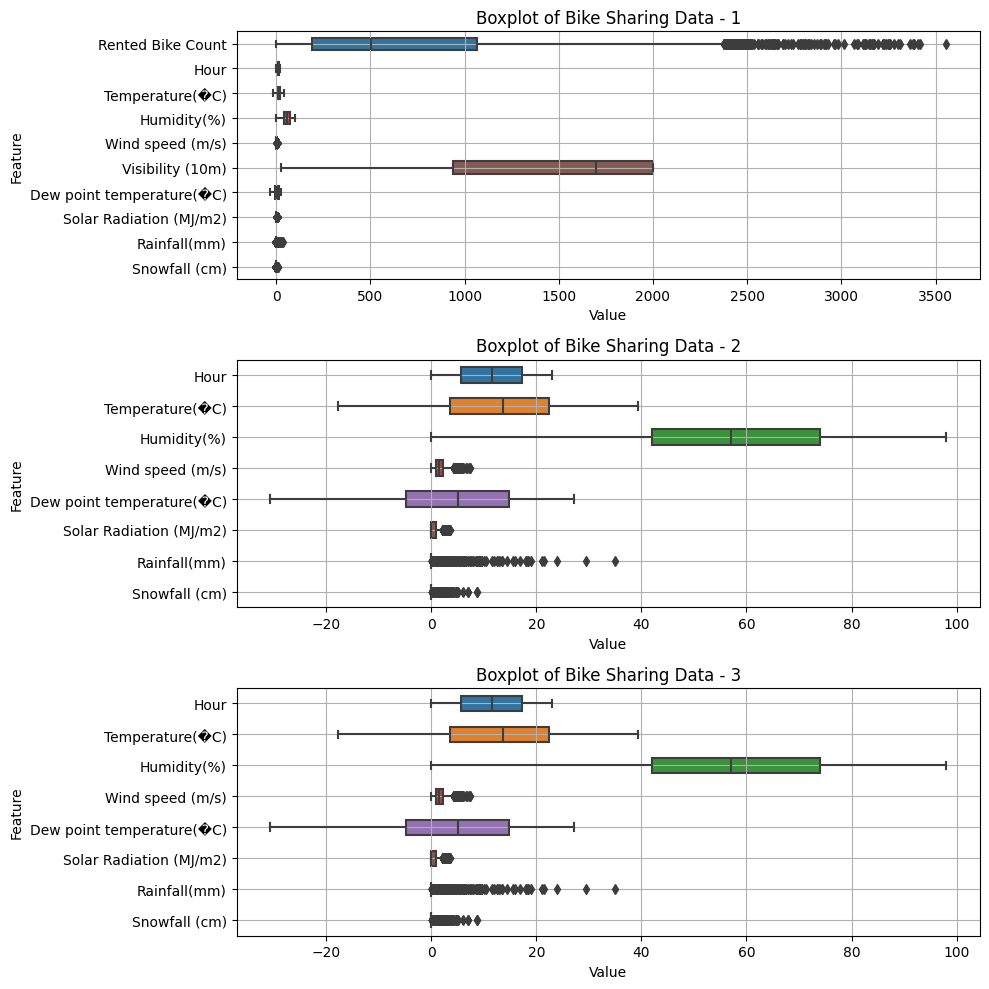

In [75]:

melted_df_b = pd.melt(df_b,id_vars="Date",value_vars=df_b.columns[:])
display(melted_df_b)
#Remove the two largest features to visualize the rest of the data
df_b_1 = df_b.drop([0,5],axis=1)
melted_df_b_1 = pd.melt(df_b_1,id_vars="Date",value_vars=df_b_1.columns[:])
#Remove the next two largest features to visualize the rest of the data
df_b_2 = df_b_1.drop([2],axis=1)
melted_df_b_2 = pd.melt(df_b_2,id_vars="Date",value_vars=df_b_2.columns[:])


plt.figure(figsize=(10,10))
angle=30
plt.subplot(311)
sns.boxplot(data=melted_df_b,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - 1")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.subplot(312)
sns.boxplot(data=melted_df_b_1,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - 2")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.subplot(313)
sns.boxplot(data=melted_df_b_2,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - 3")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.tight_layout()
plt.show()



### 2.b.
* Split samples into 70% training and 30% testing data randomly with stratify=y.

In [ ]:
#split dataframe to data and labels
X = df_b.iloc[:,1:]
y = df_b.loc[:,["Rented Bike Count"]]
display(X)
display(y)
#perform train test split : 70-30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=bike_split_seed)
print(f"Number of training samples: {len(X_train)} -> {round(100.0*len(X_train)/len(X),2)}%")
print(f"Number of testing samples: {len(X_test)} -> {round(100.0*len(X_test)/len(X),2)}%")

Number of training samples: 1512 -> 70.0%
Number of testing samples: 648 -> 30.0%


In [ ]:
#Perform Grid Search to optimize regressors

bike_svr_grid = GridSearchCV(estimator=SVR(),param_grid={
    "C":[1,10,100,1000],"gamma":np.logspace(-2,2,5),"kernel":["rbf"],"gamma":[0.1,0.2,0.3]
})
bike_svr_grid = GridSearchCV(estimator=SVR(),param_grid={
    "C":[1,10,100,1000],"gamma":np.logspace(-2,2,5),"kernel":["rbf"],"gamma":[0.1,0.2,0.3]
})
bike_svr_grid = GridSearchCV(estimator=SVR(),param_grid={
    "C":[1,10,100,1000],"gamma":np.logspace(-2,2,5),"kernel":["rbf"],"gamma":[0.1,0.2,0.3]
})

'''
t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)
sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s" % (X_plot.shape[0], svr_predict))

'''

def bike_objective(trial,regressors = None):
    scaler = StandardScaler()
    if not regressors:
        regressors = trial.suggest_categorical("regressors",["svr","krr","linreg"])
    match regressors:
        case "svr":
            kernel = trial.suggest_categorical("skernel",["linear", "poly", "rbf", "sigmoid"])
            gamma = trial.suggest_float('gamma',1e-2,1e2)
            epsilon = trial.suggest_float('epsilon',1e-2,1e2)
            regressor = SVR(kernel=kernel,gamma=gamma,epsilon=epsilon)
            print(f"Hyperparameters: regressor=SVR | kernel={kernel} | gamma={gamma} | epsilon={epsilon}")
        case "krr":
            alpha = trial.suggest_float('alpha',1e-2,1e2)
            kernel = trial.suggest_categorical("kkernel",["linear", "poly", "polynomial", "rbf", "laplacian", "sigmoid", "cosine"])
            gamma = trial.suggest_float('gamma',1e-2,1e2)
            degree = trial.suggest_int('degree',3,10)
            regressor = KernelRidge(alpha=alpha,kernel=kernel,gamma=gamma,degree=degree)
            print(f"Hyperparameters: regressor=KRR | alpha={alpha} | kernel={kernel} | gamma={gamma}")
        case "linreg":
            regressor = LinearRegression()
            print(f"Hyperparameters: regressor=Linear Regression")
        case _:
            print("Error: regressor not found.")
            return -1
    #make pipeline with parameters
    bike_tuning_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("reg",regressor)
    ])
    print("Pipeline done")
    #train data
    bike_tuning_pipeline.fit(X_train,y_train.values.ravel())
    print("Train done")
    #get predicted values from logistic regression
    test_prediction = bike_tuning_pipeline.predict(X_test)
    print("Predict done")
    #compute RMSE of pipeline
    test_mse = mean_squared_error(y_test,test_prediction)
    return test_mse


[I 2024-03-11 14:55:53,883] A new study created in memory with name: no-name-f5ef44f0-f74d-4f6d-8e79-71477c0aea22


[I 2024-03-11 14:55:54,043] Trial 0 finished with value: 64178.05201130523 and parameters: {'regressors': 'krr', 'alpha': 93.11114981416586, 'kkernel': 'linear', 'gamma': 84.69429130933628, 'degree': 3}. Best is trial 0 with value: 64178.05201130523.


Hyperparameters: regressor=KRR | alpha=93.11114981416586 | kernel=linear | gamma=84.69429130933628
Pipeline done
Train done
Predict done
Hyperparameters: regressor=KRR | alpha=63.92541048855612 | kernel=poly | gamma=23.93833656589662
Pipeline done


c:\Users\Migui\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=1.13866e-22): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
[I 2024-03-11 14:55:54,384] Trial 1 finished with value: 6955372172603.41 and parameters: {'regressors': 'krr', 'alpha': 63.92541048855612, 'kkernel': 'poly', 'gamma': 23.93833656589662, 'degree': 7}. Best is trial 0 with value: 64178.05201130523.
[I 2024-03-11 14:55:54,394] Trial 2 finished with value: 14895.532297948395 and parameters: {'regressors': 'linreg'}. Best is trial 2 with value: 14895.532297948395.
[I 2024-03-11 14:55:54,406] Trial 3 finished with value: 14895.532297948395 and parameters: {'regressors': 'linreg'}. Best is trial 2 with value: 14895.532297948395.


Train done
Predict done
Hyperparameters: regressor=Linear Regression
Pipeline done
Train done
Predict done
Hyperparameters: regressor=Linear Regression
Pipeline done
Train done
Predict done
Hyperparameters: regressor=SVR | kernel=poly | gamma=97.25691572027645 | epsilon=64.21731208542053
Pipeline done


* Construct pipeline with Standard Scaler and SVR
* Compute RMSE

In [ ]:
#define hyperparameters
kernel = "linear"
gamma = 1
epsilon = 0.1

#make pipeline with parameters
bike_svr_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("svr",SVR(kernel=kernel,gamma=gamma,epsilon=epsilon))
])

#train data
bike_svr_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from logistic regression
train_svr_prediction = bike_svr_pipeline.predict(X_train)
test_svr_prediction = bike_svr_pipeline.predict(X_test)

#compute RMSE of pipeline
train_svr_rmse = root_mean_squared_error(y_train,train_svr_prediction)
test_svr_rmse = root_mean_squared_error(y_test,test_svr_prediction)
print(f"Kernel used: {kernel}")
print(f"Kernel parameter used: {gamma}")
print(f"Epsilon used: {epsilon}")
print(f"Training Set Error: {round(train_svr_rmse,4)}")
print(f"Testing Set Error: {round(test_svr_rmse,4)}")

Kernel used: linear
Kernel parameter used: 1
Epsilon used: 0.0
Training Set Error: 129.9918
Testing Set Error: 123.0631


### 2.c.
* Repeat for KRR instead of SVR
* Construct pipeline with Standard Scaler and KRR
* Compute RMSE

In [ ]:
#define parameters
alpha = 0.5
kernel = "linear"
gamma = 3
degree = 5

#make pipeline with parameters
bike_krr_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("krr",KernelRidge(alpha=alpha,kernel=kernel,gamma=gamma,degree=degree))
])

#train data
bike_krr_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from linear regression
train_krr_prediction = bike_krr_pipeline.predict(X_train)
test_krr_prediction = bike_krr_pipeline.predict(X_test)

#compute RMSE of pipeline
train_krr_rmse = root_mean_squared_error(y_train,train_krr_prediction)
test_krr_rmse = root_mean_squared_error(y_test,test_krr_prediction)
print(f"Kernel used: {kernel}")
print(f"Kernel parameter used: {gamma}")
print(f"Alpha used: {alpha}")
print(f"Training Set Error: {round(train_krr_rmse,4)}")
print(f"Testing Set Error: {round(test_krr_rmse,4)}")

Kernel used: linear
Kernel parameter used: 3
Alpha used: 0.4
Training Set Error: 260.8477
Testing Set Error: 254.1985


### 2.d.
* Repeat for Linear Regression instead of SVR
* Construct pipeline with Standard Scaler and Linear Regression
* Compute RMSE

In [ ]:
#make pipeline
bike_lin_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("linreg",LinearRegression(fit_intercept=True))
])

#train data
bike_lin_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from linear regression
train_lin_prediction = bike_lin_pipeline.predict(X_train)
test_lin_prediction = bike_lin_pipeline.predict(X_test)

#compute RMSE of pipeline
train_lin_rmse = root_mean_squared_error(y_train,train_lin_prediction)
test_lin_rmse = root_mean_squared_error(y_test,test_lin_prediction)
print(f"Training Set Error: {round(train_lin_rmse,4)}")
print(f"Testing Set Error: {round(test_lin_rmse,4)}")

Training Set Error: 127.1177
Testing Set Error: 122.4427


* Compare results for all three models

In [ ]:
bike_train_rmse=[train_svr_rmse,train_krr_rmse, train_lin_rmse]
bike_test_rmse=[test_svr_rmse,test_krr_rmse, test_lin_rmse]
bike_errors = pd.DataFrame(data={"Train Error"=bike_train_rmse,"Test Error"=bike_test_rmse},index=["SVR","KRR","Linear Regression"])


In [ ]:
#Fix this
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c="m", s=50, label="SVR support vectors", zorder=1) #mark support vectors
plt.scatter(X, y, c="k", s=40, label="data", zorder=1) #mark everything else
plt.plot(X_plot, y_svr, c="r", label="SVR (fit: %.3fs, predict: %.3fs)" % (svr_fit, svr_predict))
plt.plot(X_plot, y_krr, c="g", label="KRR (fit: %.3fs, predict: %.3fs)" % (krr_fit, krr_predict))
plt.plot(X_plot, y_lin, c="b", label="Linear Regression (fit: %.3fs, predict: %.3fs)" % (lin_fit, lin_predict))
plt.xlabel("data")
plt.ylabel("target")
plt.title("SVR versus Kernel Ridge")
plt.legend()